In [13]:
import cv2
import dlib

class Landmarks():
  def __init__(self,image):
    self.original_image=image #stores the image for future use
    # load the face detector and shape predictor
    self.detector = dlib.get_frontal_face_detector() #instance of face detection model
    self.predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  #instance of landmark detection model, pretrained model download link: https://www.kaggle.com/datasets/sergiovirahonda/shape-predictor-68-face-landmarksdat
  
  #draws a rectangle without overwriting the original image
  def _draw_rectangle(self,image, coordinates1, coordinates2):
    new_image=image.copy()
    new_image=cv2.rectangle(new_image, coordinates1, coordinates2, (0, 255, 0), 3)   #last two arguments are color of rectangle and thickness
    return new_image

  #draws a circle without overwriting the original image
  def _draw_circle(self,image, x, y):
    new_image=image.copy()
    new_image=cv2.circle(new_image, (x, y), 3, (255, 0, 0),-1)   #last three arguments are radius,color,and thickness (-1 means filled circles)
    return new_image

  #detects faces and returns rectangles of faces (regions of interests)
  def detect_faces(self):
    gray_image = cv2.cvtColor(self.original_image, cv2.COLOR_BGR2GRAY)  #transform image into gray scale
    rectangles = self.detector(gray_image)   # detect the faces (rectangles)
    return rectangles #rectangles coordunates

  #detects landmarks and returns landmarks of faces
  def detect_landmarks(self,rectangles):
    gray_image = cv2.cvtColor(self.original_image, cv2.COLOR_BGR2GRAY)  #transform image into gray scale
    rectangles_landmarks=[]  #list to append landmarks of each face
    for rectangle in rectangles: #iterate on faces
      landmarks = self.predictor(gray_image, rectangle)   # apply the shape predictor to the face ROI
      landmarks_coordinates=[] #list to append coordinates of each rectangle
      for n in range(landmarks.num_parts):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_coordinates.append((x,y))
      rectangles_landmarks.append(landmarks_coordinates)
    return rectangles_landmarks #returns list of lists (each list contains landmarks coordinates of 1 face)

  #draw rectangles on input image
  def apply_rectangles(self,input_image,rectangles):
    detected_faces_image=input_image
    for rectangle in rectangles:
      # extract the coordinates of the bounding box
      x1 = rectangle.left()
      y1 = rectangle.top()
      x2 = rectangle.right()
      y2 = rectangle.bottom()
      detected_faces_image=self._draw_rectangle(detected_faces_image, (x1, y1), (x2, y2)) #last two arguments are color of rectangle and thickness
    return detected_faces_image
  
  #draw landmarks on input image
  def apply_landmarks(self,input_image,rectangles_coordinates):
    detected_landmarks_image=input_image
    for rectangle_coordinates in rectangles_coordinates:
      for x,y in rectangle_coordinates:
        detected_landmarks_image=self._draw_circle(detected_landmarks_image, x, y) #last three arguments are radius,color,and thickness (-1 means filled circles)
    return detected_landmarks_image #landmarks are now drawn on the image


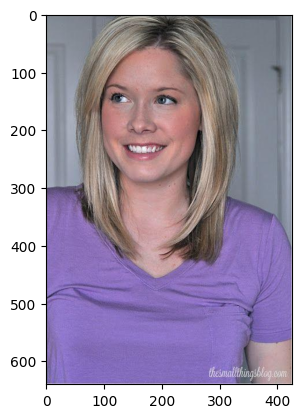

In [14]:
import matplotlib.pyplot as plt
image=cv2.imread("dataset_example.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); #for colab replace plt.imshow with cv2_imshow (from google.colab.patches import cv2_imshow) and remove bgr2rgb

In [15]:
model=Landmarks(image)
rectangles=model.detect_faces()
landmarks=model.detect_landmarks(rectangles)


In [16]:
print(rectangles)
print("landmarks")
print(landmarks)

rectangles[[(74, 94) (254, 273)]]
landmarks
[[(96, 147), (95, 169), (96, 191), (98, 213), (103, 235), (113, 254), (127, 271), (143, 286), (163, 292), (186, 290), (209, 280), (230, 268), (247, 250), (258, 228), (263, 203), (267, 178), (271, 153), (102, 128), (111, 121), (124, 121), (136, 125), (147, 132), (181, 132), (196, 127), (212, 126), (226, 128), (239, 136), (164, 150), (162, 164), (161, 179), (159, 193), (146, 203), (153, 206), (160, 209), (170, 207), (179, 204), (116, 148), (123, 140), (135, 142), (145, 152), (133, 153), (122, 153), (189, 153), (197, 144), (209, 145), (220, 152), (210, 156), (198, 156), (132, 228), (143, 224), (155, 223), (164, 225), (175, 223), (191, 224), (208, 229), (192, 246), (176, 253), (164, 254), (154, 252), (142, 246), (137, 230), (155, 228), (164, 229), (175, 228), (203, 230), (176, 243), (164, 244), (155, 242)]]


In [17]:
image_with_rectangles=model.apply_rectangles(image,rectangles) 
image_with_landmarks=model.apply_landmarks(image,landmarks)
image_with_both= model.apply_landmarks(image_with_rectangles,landmarks) #draw landmarks on image with rectangles

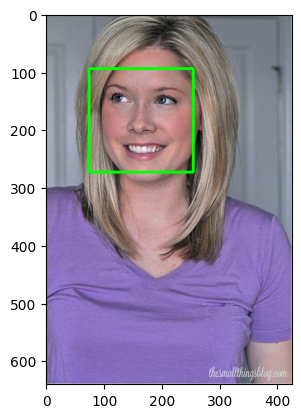

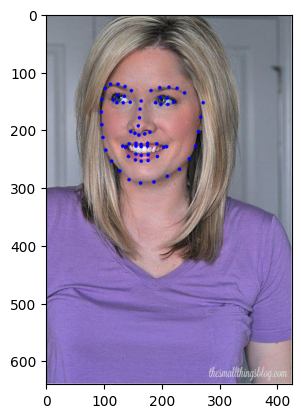

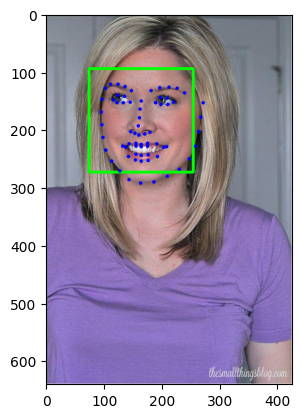

In [18]:
plt.imshow(cv2.cvtColor(image_with_rectangles, cv2.COLOR_BGR2RGB));
plt.show()
plt.imshow(cv2.cvtColor(image_with_landmarks, cv2.COLOR_BGR2RGB));
plt.show()
plt.imshow(cv2.cvtColor(image_with_both, cv2.COLOR_BGR2RGB));
plt.show()
